tumor_dataset adlı veri setinde gögüs kanseri teşhisini yapmak için KNN algoritması uygulanacaktır. Gerçekleştirilmesi gereken adımlar:
1. Gerekli kütüphanelerin import edilmesi,
2. Veri setinin incelenmesi (head, column, shape, describe, isnull gibi fonk. ve özelliklere bakılması),
3. Veri setinin temizlenmesi (eksik veya hatalı verilerin düzenlenmesi),
4. Görselleştirilmesi,
5. KNN modelinin uygulanması,
6. Modelin başarımının ölçülmesi

1. Gerekli kütüphanelerin import edilmesi

In [91]:
#gerekli kütüphaneler içe aktarıldı
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import warnings


2. Veri Setinin İncelenmesi

In [92]:
warnings.filterwarnings("ignore")

In [93]:
tumor_dataset=pd.read_csv("Data/Tumor_Dataset.csv")
tumor_dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [94]:
tumor_dataset.shape

(569, 33)

In [95]:
tumor_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [96]:
tumor_dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Veriye genel bir bakıldığında: 
 - 569 satır bulunduğu göz önüne alınarak NaN değeri içeren Unnamed:32 kolonu içinde hiç değer barındırmadığı için silinecektir.
 - id kolonu değerlendirmeye alınmayacağı için silinecektir.


Bazı Bağımsız Değişkenler:
- radius_mean: kitlenin ortalaması
- texture_mean: kitlenin dokusu için ortalama gri tonu değeri
- perimeter_mean: kitlenin çevresinin ortalama değeri
- area_mean: kitlenin alanının ortalama değeri
- smoothness_mean: kitlenin yüzeyinin pürüzsüzlüğünün ortalama değeri
- compactness_mean: kitlenin kompaktlık ölçüsünün ortalama değeri
- concavity_mean: kitlenin içbükeylik ölçüsünün ortalama değeri
- concave points_mean: kitlenin içbükey uç noktalarının ortalama değeri
...
gibi 30 adet kolona sahiptir.

Bağımlı Değişken: 
- diagnosis: sonuç (M: kötü huylu, B: iyi huylu)

3. Veri Setinin Temizlenmesi

In [97]:
#kolonların silinmesi
tumor_dataset.drop(["id","Unnamed: 32"],axis=1,inplace=True)
tumor_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [98]:
tumor_dataset['diagnosis'].value_counts()
#Veri setinde 357 iyi huylu, 212 kötü huylu tümör

diagnosis
B    357
M    212
Name: count, dtype: int64

4. Verinin Görselleştirilmesi

Text(0.5, 1.0, 'Raius Mean ve Smoothness Mean Dağılımı ')

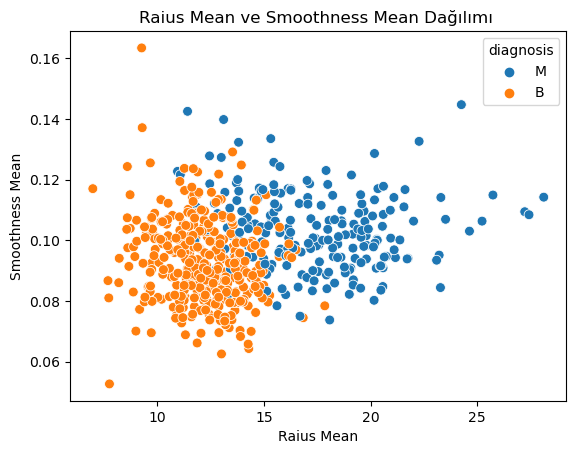

In [99]:
# radius_mean: kitlenin ortalaması ve 
# smoothness_mean: kitlenin yüzeyinin pürüzsüzlüğünün ortalama değeri
# arasındaki ilişki
radius_mean=tumor_dataset['radius_mean']
smoothness_mean=tumor_dataset['smoothness_mean']

sns.scatterplot(x=radius_mean, y=smoothness_mean, data=tumor_dataset,hue=tumor_dataset['diagnosis'], s=50)
plt.xlabel("Raius Mean")
plt.ylabel("Smoothness Mean")
plt.title("Raius Mean ve Smoothness Mean Dağılımı ")

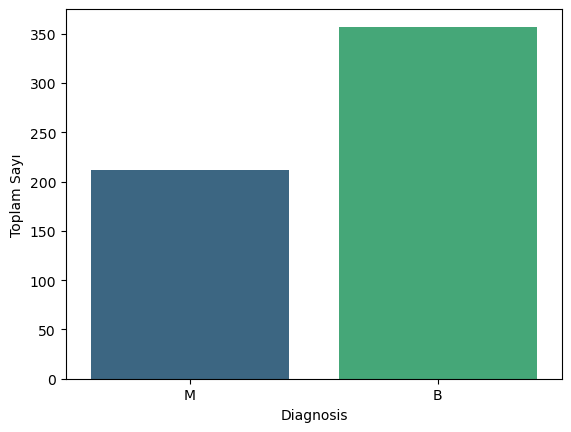

In [100]:
# iyi huylu ve kötü huylu tümor sayısı
sns.countplot(x='diagnosis', data=tumor_dataset,palette='viridis')
plt.xlabel('Diagnosis')
plt.ylabel('Toplam Sayı')
plt.show()

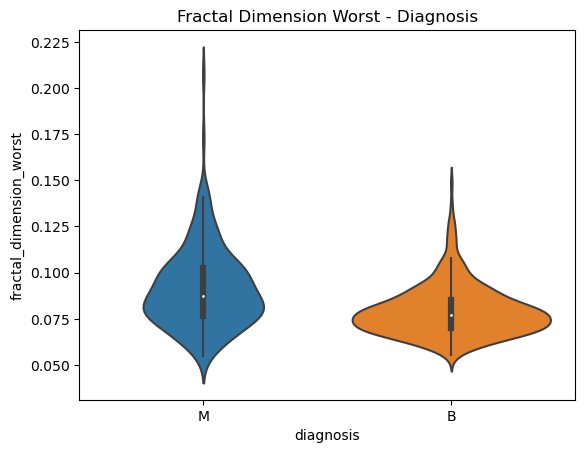

In [101]:
#fractal_dimension_worst özelliğinin iyi huylu (B) ve kötü huylu (M) sınıfları arasındaki dağılımı

#filtreleme işlemi 
df_filtered=tumor_dataset[tumor_dataset['diagnosis'].isin(['B', 'M'])]

# keman grafiği
sns.violinplot(x='diagnosis', y='fractal_dimension_worst', data=df_filtered)
plt.title('Fractal Dimension Worst - Diagnosis')
plt.show()

5. KNN Modelinin Uygulanması

In [102]:
# "diagnosis" kolonu hariç tüm kolonlar 
x_data = tumor_dataset.iloc[:, 1:-1]
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [103]:
#Verileri normalize etme
x_data=StandardScaler().fit(x_data).transform(x_data.astype(float))
print(x_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.10952635  2.29607613
   2.75062224]
 [ 1.82982061 -0.35363241  1.68595471 ... -0.14674897  1.0870843
  -0.24388967]
 [ 1.57988811  0.45618695  1.56650313 ...  0.85497394  1.95500035
   1.152255  ]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.3267666   0.41406869
  -1.10454895]
 [ 1.83834103  2.33645719  1.98252415 ...  3.19760468  2.28998549
   1.91908301]
 [-1.80840125  1.22179204 -1.81438851 ... -1.30583065 -1.74506282
  -0.04813821]]


In [104]:
label_encoder=LabelEncoder()
y_data=tumor_dataset['diagnosis']=label_encoder.fit_transform(tumor_dataset['diagnosis'])

In [116]:
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [105]:
#Train %80 ve Test %20 'i ayırma
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=5)

#Doğrulunu kontrol etme
print(x_train.shape)
print(x_test.shape)

(455, 29)
(114, 29)


In [106]:
#KNN ile sınıflandırma işlemi k=7 seçildi ve eğitim veri setleri kullanılarak fit edildi
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [107]:
# Test verilerini kullanarak tahmin yapma
y_pred = knn.predict(x_test)

6. Modelin Başarımının Ölçülmesi

In [108]:
acc_train=accuracy_score(y_train, knn.predict(x_train))
acc_test=accuracy_score(y_test, y_pred)
print("Train set acc: ", acc_train)
print("Test set acc: ", acc_test)

Train set acc:  0.9758241758241758
Test set acc:  0.956140350877193


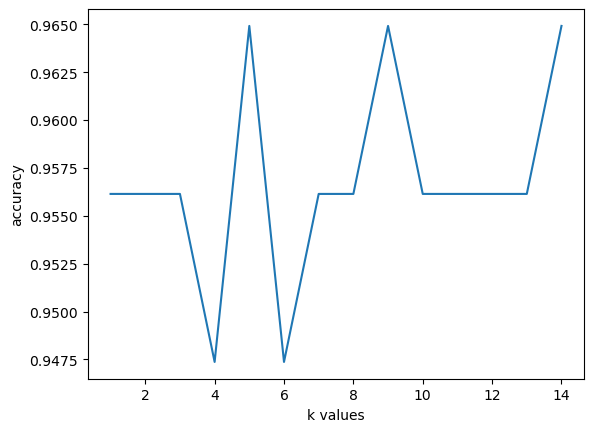

In [109]:
score_list = []
for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,15), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

Confusion Matrix:
- confusion_matrix fonksiyonu, sınıflandırma problemlerinde modelin performansını değerlendirmek için kullanılan bir matris olan karışıklık matrisini (confusion matrix) oluşturur. Bu matris, gerçek sınıfları ve modelin tahminlerini içerir.

- TN (True Negative): Gerçek sınıf 0, modelin de sınıf 0 olarak doğru bir şekilde tahmin ettiği durum.
- FP (False Positive): Gerçek sınıf 0, modelin de sınıf 1 olarak yanlış bir şekilde tahmin ettiği durum.
- FN (False Negative): Gerçek sınıf 1, modelin de sınıf 0 olarak yanlış bir şekilde tahmin ettiği durum.
- TP (True Positive): Gerçek sınıf 1, modelin de sınıf 1 olarak doğru bir şekilde tahmin ettiği durum.

In [110]:
y_pred #daha önce hesaplanmıştı

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1])

In [111]:
y_true=y_test
y_true #y_test içerisinde bulunan "diagnos" kolonunun eğitilmemiş verisi, yani test verisi"

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1])

In [113]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cm = [[tp,fp],[fn,tn]]
cm

[[43, 0], [5, 66]]

- TP=43 pozitif örneği doğru bir şekilde bildiğini, 
- FP=0 hiç negatif örneği yanlış tahmin etmediği,
- FN=5 pozitif örneği yanlış tahmin ettiğini, 
- TN=66 negatif örneği doğru bir şekilde tanıdığını söylenebilir.

In [118]:
TP = 43
FN = 5
TN = 66
FP = 0

# class = 1
precision_1 = TP / (TP + FP)
recall_1 = TP / (TP + FN)


In [119]:
TP = 66
FN = 0
TN = 43
FP = 5

# class = 0
precision_0 = TP / (TP + FP)
recall_0 = TP / (TP + FN)

In [120]:
print(f"class=0 {precision_0:.2f} {recall_0:.2f}")
print(f"class=1 {precision_1:.2f} {recall_1:.2f}")

class=0 0.93 1.00
class=1 1.00 0.90


In [121]:
f1_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

In [122]:
print(f"{f1_score_0:.2f}")
print(f"{f1_score_1:.2f}")

0.96
0.95
